In [ ]:
#!pip install keras

# Create flowers dataset

In [1]:
import os
import random
import shutil


# To create the same dataset
random.seed(0)

# Here write the path to your dataset

base = 'C:/Users/David_000/Documents/EDAN95'
original_dataset_dir = os.path.join(base, r'flowers')
dataset = os.path.join(base, r'flowers_split')

train_dir = os.path.join(dataset, r'train')
validation_dir = os.path.join(dataset, r'validation')
test_dir = os.path.join(dataset, r'test')

categories = os.listdir(original_dataset_dir)
categories = [category for category in categories if not category.startswith('.')]
print('Image types:', categories)
data_folders = [os.path.join(original_dataset_dir, category) for category in categories]

pairs = []
for folder, category in zip(data_folders, categories):
    images = os.listdir(folder)
    images = [image for image in images if not image.startswith('.')]
    pairs.extend([(image, category) for image in images])

random.shuffle(pairs)
img_nbr = len(pairs)
train_images = pairs[0:int(0.6 * img_nbr)]
val_images = pairs[int(0.6 * img_nbr):int(0.8 * img_nbr)]
test_images = pairs[int(0.8 * img_nbr):]

# print(train_images)
print(len(train_images))
print(len(val_images))
print(len(test_images))

for image, label in train_images:
    src = os.path.join(original_dataset_dir, label, image)
    dst = os.path.join(train_dir, label, image)
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copyfile(src, dst)

for image, label in val_images:
    src = os.path.join(original_dataset_dir, label, image)
    dst = os.path.join(validation_dir, label, image)
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copyfile(src, dst)

for image, label in test_images:
    src = os.path.join(original_dataset_dir, label, image)
    dst = os.path.join(test_dir, label, image)
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copyfile(src, dst)

Image types: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
2595
865
866


# Implement a Simple CNN

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

import os
import random
import shutil
import numpy as np


Using TensorFlow backend.


In [3]:
base = 'C:/Users/David_000/Documents/EDAN95'
original_dataset_dir = os.path.join(base, r'flowers')
dataset = os.path.join(base, r'flowers_split')

train_dir = os.path.join(dataset, r'train')
validation_dir = os.path.join(dataset, r'validation')
test_dir = os.path.join(dataset, r'test')

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150),
    batch_size=25, class_mode= 'categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150),
    batch_size=25, class_mode= 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), 
    batch_size=20, class_mode='categorical')

Found 2625 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model.compile(loss='binary_crossentropy',
#             optimizer=optimizers.RMSprop(lr=1e-4),
#             metrics=['acc'])

In [8]:
history = model.fit_generator(train_generator, steps_per_epoch=105, epochs=10,
                            validation_data=validation_generator, validation_steps=30)

Epoch 1/10
105/105 [==============================] - 227s 2s/step - loss: 1.4559 - accuracy: 0.3562 - val_loss: 1.3244 - val_accuracy: 0.4640
Epoch 2/10
105/105 [==============================] - 160s 2s/step - loss: 1.1803 - accuracy: 0.5166 - val_loss: 0.9218 - val_accuracy: 0.4973
Epoch 3/10
105/105 [==============================] - 139s 1s/step - loss: 1.0151 - accuracy: 0.5855 - val_loss: 0.8404 - val_accuracy: 0.6378
Epoch 4/10
105/105 [==============================] - 257s 2s/step - loss: 0.9096 - accuracy: 0.6446 - val_loss: 0.8220 - val_accuracy: 0.6446
Epoch 5/10
105/105 [==============================] - 259s 2s/step - loss: 0.8099 - accuracy: 0.6808 - val_loss: 1.3600 - val_accuracy: 0.6419
Epoch 6/10
105/105 [==============================] - 265s 3s/step - loss: 0.7306 - accuracy: 0.7116 - val_loss: 0.9905 - val_accuracy: 0.6581
Epoch 7/10
105/105 [==============================] - 225s 2s/step - loss: 0.6262 - accuracy: 0.7562 - val_loss: 0.6614 - val_accuracy: 0.6662

In [6]:
from sklearn import metrics

In [31]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir, shuffle = False,target_size=(150, 150), 
    batch_size=20, class_mode='categorical')

pred = model.predict_generator(test_generator)

Found 865 images belonging to 5 classes.


In [32]:
test_labels = test_generator.classes
predictions = np.argmax(pred,axis=1)

print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       175
           1       0.72      0.81      0.76       215
           2       0.50      0.66      0.57       148
           3       0.74      0.64      0.69       135
           4       0.68      0.57      0.62       192

    accuracy                           0.67       865
   macro avg       0.68      0.67      0.67       865
weighted avg       0.69      0.67      0.68       865

Confusion Matrix: 
[[116  16  20  12  11]
 [ 18 174  10  11   2]
 [  5  18  97   1  27]
 [  7  20  10  86  12]
 [  6  14  56   6 110]]


In [33]:
# model.save_weights('simpleCNN1.model')

### Create second model with dropout and softmax

In [8]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64*2, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(128*2, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(512*2, activation='relu'))
model2.add(layers.Dense(5, activation='softmax'))

In [9]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history2 = model2.fit_generator(train_generator, steps_per_epoch=105, epochs=10,
                            validation_data=validation_generator, validation_steps=30)

Epoch 1/10
 40/105 [==========>...................] - ETA: 4:16 - loss: 1.7712 - accuracy: 0.2180

KeyboardInterrupt: 

In [37]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir, shuffle = False,target_size=(150, 150), 
    batch_size=20, class_mode='categorical')

pred = model2.predict_generator(test_generator)

Found 865 images belonging to 5 classes.


In [38]:
test_labels = test_generator.classes
predictions = np.argmax(pred,axis=1)

print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.69      0.71       175
           1       0.63      0.84      0.72       215
           2       0.55      0.46      0.50       148
           3       0.75      0.68      0.71       135
           4       0.64      0.58      0.61       192

    accuracy                           0.66       865
   macro avg       0.66      0.65      0.65       865
weighted avg       0.66      0.66      0.66       865

Confusion Matrix: 
[[120  36   3  10   6]
 [ 12 180   4  12   7]
 [  9  27  68   2  42]
 [ 11  22   3  92   7]
 [  9  19  45   7 112]]


In [39]:
model2.save_weights('simpleCNN2.model')

# Plot Accuracy

In [2]:
import matplotlib.pyplot as plt

def plot_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    

# Setting up data augmentation

In [60]:
# train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
#                              shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,
                                   width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1. / 255)

In [61]:
# from keras.preprocessing import image

In [62]:
# fnames = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir)]

# img_path = fnames[3]
# img = image.load_img(img_path, target_size=(150, 150))
# x = image.img_to_array(img)
# x = x.reshape((1,) + x.shape)
# i=0
# for batch in datagen.flow(x, batch_size=1):
#     plt.figure(i)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
#     i += 1
#     if i % 4 == 0:
#         break
# plt.show()

In [63]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=25, class_mode='categorical')


validation_generator = val_datagen.flow_from_directory(
    validation_dir,target_size=(150, 150), 
    batch_size=20,class_mode='categorical')

Found 2625 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [64]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
# model3.add(layers.Dropout(0.25))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
# model3.add(layers.Dropout(0.25))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(5, activation='softmax'))

In [80]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 128)      

In [66]:
history3 = model3.fit_generator(train_generator, steps_per_epoch=105, epochs=10,
                            validation_data=validation_generator, validation_steps=30)

Epoch 1/10
105/105 [==============================] - 234s 2s/step - loss: 1.3864 - accuracy: 0.3882 - val_loss: 1.3823 - val_accuracy: 0.4717
Epoch 2/10
105/105 [==============================] - 250s 2s/step - loss: 1.1382 - accuracy: 0.5250 - val_loss: 1.1126 - val_accuracy: 0.5915
Epoch 3/10
105/105 [==============================] - 217s 2s/step - loss: 1.0399 - accuracy: 0.5882 - val_loss: 1.2824 - val_accuracy: 0.6359
Epoch 4/10
105/105 [==============================] - 171s 2s/step - loss: 0.9657 - accuracy: 0.6107 - val_loss: 1.0108 - val_accuracy: 0.6300
Epoch 5/10
105/105 [==============================] - 170s 2s/step - loss: 0.9349 - accuracy: 0.6373 - val_loss: 0.7306 - val_accuracy: 0.5880
Epoch 6/10
105/105 [==============================] - 217s 2s/step - loss: 0.9377 - accuracy: 0.6309 - val_loss: 0.7179 - val_accuracy: 0.6923
Epoch 7/10
105/105 [==============================] - 246s 2s/step - loss: 0.8606 - accuracy: 0.6720 - val_loss: 1.3650 - val_accuracy: 0.6550

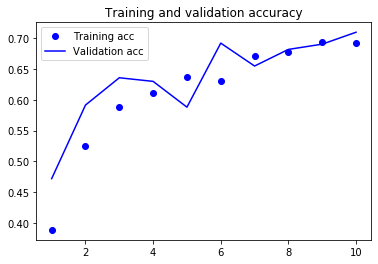

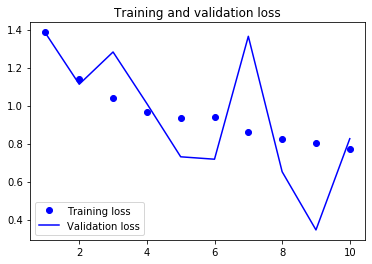

In [120]:
plot_acc(history3)

In [67]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir, shuffle = False,target_size=(150, 150), 
    batch_size=20, class_mode='categorical')

pred = model3.predict_generator(test_generator)

Found 865 images belonging to 5 classes.


In [68]:
test_labels = test_generator.classes
predictions = np.argmax(pred,axis=1)

print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       175
           1       0.74      0.80      0.77       215
           2       0.71      0.54      0.62       148
           3       0.77      0.75      0.76       135
           4       0.69      0.74      0.72       192

    accuracy                           0.73       865
   macro avg       0.73      0.72      0.73       865
weighted avg       0.73      0.73      0.73       865

Confusion Matrix: 
[[137  13   7   5  13]
 [ 24 172   3  10   6]
 [  7  17  80   5  39]
 [  4  23   2 101   5]
 [ 10   8  20  11 143]]


In [69]:
model3.save_weights('simpleCNN_augdata.model')

# Import NetWork from Keras

In [13]:
from keras.applications.inception_v3 import InceptionV3

In [72]:
base_model = InceptionV3(weights='imagenet', include_top=False)

final_model = models.Sequential()
final_model.add(layers.Dense(512, activation = 'relu', input_dim = 3*3*2048))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(5, activation = 'softmax'))

final_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150),
    batch_size=25, class_mode= 'categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150),
    batch_size=20, class_mode= 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, shuffle = False, target_size=(150, 150), 
    batch_size=20, class_mode='categorical')

Found 2625 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [96]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 25

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 2048))
    labels = np.zeros(shape=(sample_count,5))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size,class_mode='categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 865)
test_features, test_labels = extract_features(test_dir, 865)


Found 2625 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [97]:
train_features_f = np.reshape(train_features, (2000, 3*3* 2048))
validation_features_f = np.reshape(validation_features, (865, 3*3* 2048))
test_features_f = np.reshape(test_features, (865, 3*3* 2048))


In [98]:
final_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
history_V3 = final_model.fit(train_features_f, train_labels, epochs=10, 
                    batch_size=25, validation_data=(validation_features_f, validation_labels))

Train on 2000 samples, validate on 865 samples
Epoch 1/10
2000/2000 [==============================] - 11s 5ms/step - loss: 0.4247 - accuracy: 0.8610 - val_loss: 0.7186 - val_accuracy: 0.7861
Epoch 2/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3420 - accuracy: 0.8895 - val_loss: 0.7454 - val_accuracy: 0.8104
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3159 - accuracy: 0.8865 - val_loss: 0.7349 - val_accuracy: 0.7954
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3979 - accuracy: 0.8780 - val_loss: 0.8497 - val_accuracy: 0.7988
Epoch 5/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3631 - accuracy: 0.8695 - val_loss: 0.7877 - val_accuracy: 0.8069
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2968 - accuracy: 0.8870 - val_loss: 0.7436 - val_accuracy: 0.8081
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2502 - acc

In [100]:


pred = final_model.predict(test_features_f)

In [110]:

predictions = np.argmax(pred,axis=1)

print("Classification Report: ")
print(metrics.classification_report(np.argmax(test_labels,axis = 1), predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(np.argmax(test_labels,axis = 1), predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       175
           1       0.87      0.84      0.85       215
           2       0.75      0.74      0.74       148
           3       0.72      0.87      0.79       135
           4       0.85      0.76      0.80       192

    accuracy                           0.81       865
   macro avg       0.80      0.81      0.80       865
weighted avg       0.81      0.81      0.81       865

Confusion Matrix: 
[[148  12   1  11   3]
 [ 14 180   5  11   5]
 [  7   3 109  14  15]
 [  2  10   3 118   2]
 [  5   3  28  11 145]]


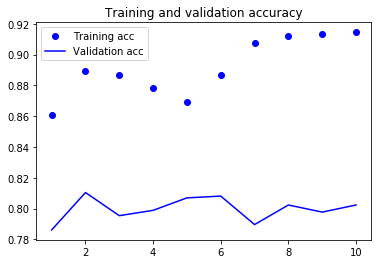

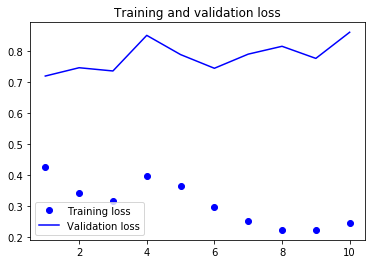

In [119]:
plot_acc(history_V3)

## Inception V3 with augment data

In [17]:
train_datagen_aug = ImageDataGenerator(rotation_range=40, rescale = 1./255, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen_aug.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=25, class_mode='categorical')


validation_generator = val_datagen.flow_from_directory(validation_dir,target_size=(150, 150),
                                                        batch_size=20,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), 
    batch_size=20, class_mode='categorical')

Found 2625 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [ ]:
# base_model = InceptionV3(weights='imagenet', include_top=False)
# x = base_model.output
# x = layers.Dense(512, activation = 'relu')(x)
# preds = layers.Dense(5, activation = 'softmax')(x)

# for layer in base_model.layers:
#     layer.trainable = False

# model_V3_aug = models.Model(inputs = base_model.input, outputs = preds)

# model_V3_aug.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [18]:
base_model = InceptionV3(weights='imagenet', include_top=False)

final_model = models.Sequential()
final_model.add(layers.Dense(512*2, activation = 'relu', input_dim = 3*3*2048))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(5, activation = 'softmax'))

final_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
datagen = ImageDataGenerator(rescale=1./255)
datagen_aug = ImageDataGenerator(rotation_range=40, rescale = 1./255, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
batch_size = 25

def extract_features(directory, sample_count, train = False):
    features = np.zeros(shape=(sample_count, 3, 3, 2048))
    labels = np.zeros(shape=(sample_count,5))
    if train == True:
        generator = datagen_aug.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size,class_mode='categorical')
    else:
        generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size,class_mode='categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000, True)
validation_features, validation_labels = extract_features(validation_dir, 850)
test_features, test_labels = extract_features(test_dir, 850)


Found 2625 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [20]:
train_features_f = np.reshape(train_features, (2000, 3*3* 2048))
validation_features_f = np.reshape(validation_features, (850, 3*3* 2048))
test_features_f = np.reshape(test_features, (850, 3*3* 2048))


In [ ]:
history_V3_aug = final_model.fit(train_features_f, train_labels, epochs=2, 
                    batch_size=25, validation_data=(validation_features_f, validation_labels))


In [117]:
# final_model.save_weights('model_V3_aug.model')

In [25]:
pred = final_model.predict(test_features_f)

In [26]:
predictions = np.argmax(pred,axis=1)

print("Classification Report: ")
print(metrics.classification_report(np.argmax(test_labels,axis = 1), predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(np.argmax(test_labels,axis = 1), predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       172
           1       0.74      0.91      0.82       212
           2       0.75      0.63      0.68       145
           3       0.85      0.63      0.72       130
           4       0.72      0.82      0.76       191

    accuracy                           0.77       850
   macro avg       0.79      0.75      0.76       850
weighted avg       0.78      0.77      0.77       850

Confusion Matrix: 
[[136  20   1   5  10]
 [  9 192   5   1   5]
 [  2   8  91   5  39]
 [  5  33   3  82   7]
 [  5   5  21   4 156]]


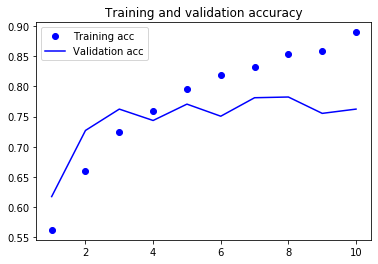

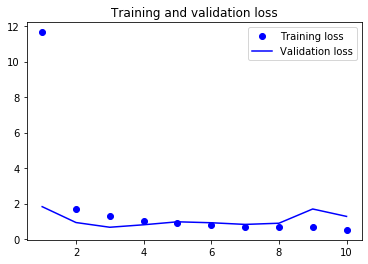

In [118]:
plot_acc(history_V3_aug)

# Other way of adding to model

In [31]:
train_datagen = ImageDataGenerator(rotation_range=40, rescale = 1./255, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150),
    batch_size=25, class_mode= 'categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150),
    batch_size=20, class_mode= 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, shuffle = False, target_size=(150, 150), 
    batch_size=20, class_mode='categorical')

Found 2625 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [32]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape = (150,150,3))

model_extra = models.Sequential()
model_extra.add(base_model)
model_extra.add(layers.Flatten())
model_extra.add(layers.Dense(512, activation = 'relu'))
model_extra.add(layers.Dense(5, activation = 'softmax'))


for layer in model_extra.layers[:-2]:
    layer.trainable = False


model_extra.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history_test = model_extra.fit_generator(train_generator, steps_per_epoch=105, epochs=10,
                            validation_data=validation_generator, validation_steps=30)

Epoch 1/10
105/105 [==============================] - 445s 4s/step - loss: 2.2390 - accuracy: 0.5451 - val_loss: 5.4734 - val_accuracy: 0.4883
Epoch 2/10
105/105 [==============================] - 348s 3s/step - loss: 0.9302 - accuracy: 0.6606 - val_loss: 2.8551 - val_accuracy: 0.4786
Epoch 3/10
105/105 [==============================] - 405s 4s/step - loss: 0.9248 - accuracy: 0.6735 - val_loss: 0.6347 - val_accuracy: 0.5538
Epoch 4/10
105/105 [==============================] - 398s 4s/step - loss: 0.7952 - accuracy: 0.7059 - val_loss: 2.7664 - val_accuracy: 0.5083
Epoch 5/10
105/105 [==============================] - 341s 3s/step - loss: 0.7540 - accuracy: 0.7253 - val_loss: 1.8202 - val_accuracy: 0.5709
Epoch 6/10
105/105 [==============================] - 373s 4s/step - loss: 0.7000 - accuracy: 0.7425 - val_loss: 2.2199 - val_accuracy: 0.5470
Epoch 7/10
105/105 [==============================] - 357s 3s/step - loss: 0.6898 - accuracy: 0.7451 - val_loss: 0.8871 - val_accuracy: 0.6467

In [34]:
base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape = (150,150,3))

model_extra2 = models.Sequential()
model_extra2.add(base_model)
model_extra2.add(layers.Flatten())
model_extra2.add(layers.Dense(512, activation = 'relu'))
model_extra2.add(layers.Dense(5, activation = 'softmax'))


base_model2.trainable = False


model_extra2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history_test2 = model_extra2.fit_generator(train_generator, steps_per_epoch=105, epochs=10,
                            validation_data=validation_generator, validation_steps=30)

Epoch 1/10
105/105 [==============================] - 410s 4s/step - loss: 2.5569 - accuracy: 0.5128 - val_loss: 2.8895 - val_accuracy: 0.4433
Epoch 2/10
105/105 [==============================] - 979s 9s/step - loss: 0.9266 - accuracy: 0.6670 - val_loss: 5.9455 - val_accuracy: 0.5060
Epoch 3/10
105/105 [==============================] - 268s 3s/step - loss: 0.8100 - accuracy: 0.6960 - val_loss: 3.4488 - val_accuracy: 0.4752
Epoch 4/10
 38/105 [=========>....................] - ETA: 2:56 - loss: 0.7273 - accuracy: 0.7484

KeyboardInterrupt: 

# HEATMAP STUFF    

In [36]:
from keras import backend as K

In [41]:

K.clear_session()
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape = (150,150,3))

final_model = models.Sequential()
final_model.add(base_model)
final_model.add(layers.Flatten())
final_model.add(layers.Dense(512, activation = 'relu'))
final_model.add(layers.Dense(5, activation = 'softmax'))

final_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
final_model.load_weights('model_V3_aug.model')

ValueError: You are trying to load a weight file containing 2 layers into a model with 3 layers.

In [49]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = 'C:/Users/David_000/Documents/EDAN95/flowers/daisy/446484749_4044affcaf_n.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(150, 150))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
x = np.reshape(x, (1,150*150*3))
# x = preprocess_input(x)

In [50]:
preds = final_model.predict(x)

ValueError: Error when checking input: expected dense_1_input to have shape (18432,) but got array with shape (67500,)